Akurasi: 0.727
Confusion Matrix:
 [[81 18]
 [24 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.63      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



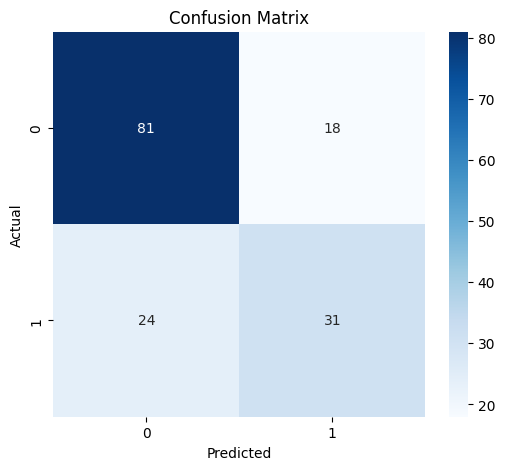

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df: pd.DataFrame = pd.read_csv(
  filepath_or_buffer="data/diabetes.csv",
  float_precision="high",
  sep=","
)

X: pd.DataFrame = df.drop("Outcome", axis=1)
Y: pd.Series = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

svm_model = SVC(
  kernel="rbf",
  C=1.0,
  random_state=42
)
svm_model.fit(X_train, Y_train)

Y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

print(f"Akurasi: {round(accuracy, 3)}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
